In [3]:
import numpy as np
from matplotlib import pyplot as plt

import logging

logging.basicConfig(level=logging.INFO)  # Set the logging level to INFO

In [4]:
def activate(x, W, b):
    # x should be of size (input X number of samples)
    return 1 / (1 + np.exp(-(np.matmul(W, x) + b)))

def cost(W2, W3, W4, b2, b3, b4):
    costvec = np.zeros(10)
    for i in range(10):
        x = x_full[:,i].reshape(input_size,-1)
        a2 = activate(x, W2, b2)
        a3 = activate(a2, W3, b3)
        a4 = activate(a3, W4, b4)
        costvec[i] = np.linalg.norm(y[:, i].reshape(input_size,-1) - a4, 2)
    return np.linalg.norm(costvec, 2)**2

In [6]:
x1 = np.array([[0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7]])
x2 = np.array([[0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6]])
y = np.array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])
#
logging.info("Value of x1:\n%s\nShape of x1: %s", x1, x1.shape)
logging.info("Value of x2:\n%s\nShape of x2: %s", x2, x2.shape)
logging.info("Value of y:\n%s\nShape of y: %s", y, y.shape)

INFO:root:Value of x1:
[[0.1 0.3 0.1 0.6 0.4 0.6 0.5 0.9 0.4 0.7]]
Shape of x1: (1, 10)
INFO:root:Value of x2:
[[0.1 0.4 0.5 0.9 0.2 0.3 0.6 0.2 0.4 0.6]]
Shape of x2: (1, 10)
INFO:root:Value of y:
[[1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1]]
Shape of y: (2, 10)


In [11]:
x_full = np.concatenate((x1,x2),axis=0)
print(x_full)

[[0.1 0.3 0.1 0.6 0.4 0.6 0.5 0.9 0.4 0.7]
 [0.1 0.4 0.5 0.9 0.2 0.3 0.6 0.2 0.4 0.6]]


In [7]:
#np.random.seed(5000)
#W2 = 0.5 * np.random.randn(2, 2)
#W3 = 0.5 * np.random.randn(3, 2)
#W4 = 0.5 * np.random.randn(2, 3)
#b2 = 0.5 * np.random.randn(2, 1)
#b3 = 0.5 * np.random.randn(3, 1)
#b4 = 0.5 * np.random.randn(2, 1)

W2 = 0.5*np.array([[.1, .2], [.3, .4]])
W3 = 0.5*np.array([[-.1, .2], [-.3, .4], [.5, -.6]])
W4 = 0.5*np.array([[.1, -.2, .3], [-.4, -.5, .6]])
b2 = 0.5 * np.zeros((2, 1))
b3 = 0.5 * np.zeros((3, 1))
b4 = 0.5 * np.zeros((2, 1))

#
logging.info("Value of W2:\n%s\nShape of W2: %s", W2, W2.shape)
logging.info("Value of W3:\n%s\nShape of W3: %s", W3, W3.shape)
logging.info("Value of W4:\n%s\nShape of W4: %s", W4, W4.shape)
logging.info("Value of b2:\n%s\nShape of b2: %s", b2, b2.shape)
logging.info("Value of b3:\n%s\nShape of b3: %s", b3, b3.shape)
logging.info("Value of b4:\n%s\nShape of b4: %s", b4, b4.shape)

INFO:root:Value of W2:
[[0.05 0.1 ]
 [0.15 0.2 ]]
Shape of W2: (2, 2)
INFO:root:Value of W3:
[[-0.05  0.1 ]
 [-0.15  0.2 ]
 [ 0.25 -0.3 ]]
Shape of W3: (3, 2)
INFO:root:Value of W4:
[[ 0.05 -0.1   0.15]
 [-0.2  -0.25  0.3 ]]
Shape of W4: (2, 3)
INFO:root:Value of b2:
[[0.]
 [0.]]
Shape of b2: (2, 1)
INFO:root:Value of b3:
[[0.]
 [0.]
 [0.]]
Shape of b3: (3, 1)
INFO:root:Value of b4:
[[0.]
 [0.]]
Shape of b4: (2, 1)


In [14]:
eta = 0.05  # learning rate
Niter = int(1) #int(1e6)  # number of SG iterations
savecost = np.zeros(Niter)  # value of cost function at each iteration
input_size = 2

In [15]:
for counter in range(Niter):
    k = np.random.randint(10)  # choose a training point at random
    x = x_full[:,k].reshape(input_size,-1)
    # Forward pass
    a2 = activate(x, W2, b2)
    a3 = activate(a2, W3, b3)
    a4 = activate(a3, W4, b4)
    # Backward pass
    delta4 = a4*(1 - a4)*(a4 - y[:, k].reshape(input_size,-1))
    delta3 = a3*(1 - a3)*np.matmul(W4.T,delta4)
    delta2 = a2*(1 - a2)*np.matmul(W3.T,delta3)
    # Gradient step
    W2 -= eta*np.outer(delta2, x)
    W3 -= eta*np.outer(delta3, a2)
    W4 -= eta*np.outer(delta4, a3)
    b2 -= eta*delta2
    b3 -= eta*delta3
    b4 -= eta*delta4
    
    #
    logging.info("Value of k: %s", k)
    logging.info("Value of x:\n%s\nShape of x: %s", x, x.shape)
    logging.info("Value of a2:\n%s\nShape of a2: %s", a2, a2.shape)
    logging.info("Value of a3:\n%s\nShape of a3: %s", a3, a3.shape)
    logging.info("Value of a4:\n%s\nShape of a4: %s", a4, a4.shape)
    logging.info("Value of delta4:\n%s\nShape of delta4: %s", delta4, delta4.shape)
    logging.info("Value of delta3:\n%s\nShape of delta3: %s", delta3, delta3.shape)
    logging.info("Value of delta2:\n%s\nShape of delta2: %s", delta2, delta2.shape)
    logging.info("Value of W2:\n%s\nShape of W2: %s", W2, W2.shape)
    
    # Monitor progress
    newcost = cost(W2, W3, W4, b2, b3, b4) 
    if counter%100000==0:
        print(newcost)
    savecost[counter] = newcost

INFO:root:Value of k: 1
INFO:root:Value of x:
[[0.3]
 [0.4]]
Shape of x: (2, 1)
INFO:root:Value of a2:
[[0.51455335]
 [0.53010591]]
Shape of a2: (2, 1)
INFO:root:Value of a3:
[[0.50096638]
 [0.50174127]
 [0.48938004]]
Shape of a3: (3, 1)
INFO:root:Value of a4:
[[0.50788535]
 [0.49233694]]
Shape of a4: (2, 1)
INFO:root:Value of delta4:
[[-0.12299806]
 [ 0.12305532]]
Shape of delta4: (2, 1)
INFO:root:Value of delta3:
[[-0.00696623]
 [-0.00383781]
 [ 0.00485999]]
Shape of delta3: (3, 1)
INFO:root:Value of delta2:
[[ 0.00055225]
 [-0.0007001 ]]
Shape of delta2: (2, 1)
INFO:root:Value of W2:
[[0.06040811 0.10016877]
 [0.13624177 0.19966581]]
Shape of W2: (2, 2)


5.002395394172991


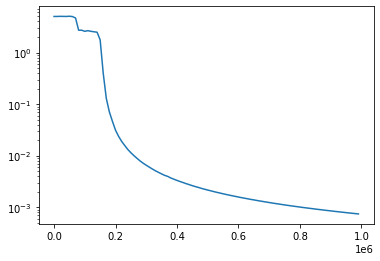

In [11]:
np.save('costvec.npy', savecost)
plt.semilogy(range(0, Niter, int(1e4)), savecost[::int(1e4)])
plt.show()